# 서울시 가구원수별 가구수 통계 분석 - 2019년

In [132]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [133]:
df = pd.read_csv('./data/number_of_households.tsv', sep='\t', encoding='utf-8', header=1)
df.head()

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3
1,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3


In [134]:
# 필요없는 데이터 삭제, 인덱스 새로 설정
del df['기간']
df.drop([0], inplace=True)
df.rename({'구분': '구별'}, inplace=True, axis=1)
df.set_index('구별', inplace=True)
df.head()

,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
구별,,,,,,,,,
종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3
광진구,"149,905","58,714","35,678","28,054","21,454","4,711","1,006",288,2.2


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일반가구수   25 non-null     object 
 1   1인      25 non-null     object 
 2   2인      25 non-null     object 
 3   3인      25 non-null     object 
 4   4인      25 non-null     object 
 5   5인      25 non-null     object 
 6   6인      25 non-null     object 
 7   7인 이상   25 non-null     object 
 8   평균가구원수  25 non-null     float64
dtypes: float64(1), object(8)
memory usage: 2.0+ KB


In [136]:
# '평균가구원수'를 제외한 모든 데이터들을 int로 변경
df['일반가구수'] = df['일반가구수'].str.replace(',', '')
df['1인'] = df['1인'].str.replace(',', '')
df['2인'] = df['2인'].str.replace(',', '')
df['3인'] = df['3인'].str.replace(',', '')
df['4인'] = df['4인'].str.replace(',', '')
df['5인'] = df['5인'].str.replace(',', '')
df['6인'] = df['6인'].str.replace(',', '')
df['7인 이상'] = df['7인 이상'].str.replace(',', '')
df = df.astype({
    '일반가구수': int,
    '1인': int,
    '2인': int,
    '3인': int,
    '4인': int,
    '5인': int,
    '6인': int,
    '7인 이상': int
    })
df.head()

,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
구별,,,,,,,,,
종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
중구,54496,22078,14578,9540,6292,1533,373,102,2.1
용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
성동구,122770,41488,32125,25634,18379,4014,877,253,2.3
광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일반가구수   25 non-null     int32  
 1   1인      25 non-null     int32  
 2   2인      25 non-null     int32  
 3   3인      25 non-null     int32  
 4   4인      25 non-null     int32  
 5   5인      25 non-null     int32  
 6   6인      25 non-null     int32  
 7   7인 이상   25 non-null     int32  
 8   평균가구원수  25 non-null     float64
dtypes: float64(1), int32(8)
memory usage: 1.2+ KB


In [138]:
# 컬럼수 축소
df['4인이상'] = df['4인'] + df['5인'] + df['6인'] + df['7인 이상']
del df['4인']
del df['5인']
del df['6인']
del df['7인 이상']

In [139]:
df = df.reindex(columns=['1인', '2인', '3인', '4인이상', '일반가구수', '평균가구원수'])
df.head()

,1인,2인,3인,4인이상,일반가구수,평균가구원수
구별,,,,,,
종로구,24671,16208,11154,10619,62652,2.2
중구,22078,14578,9540,8300,54496,2.1
용산구,35148,25164,17439,15426,93177,2.2
성동구,41488,32125,25634,23523,122770,2.3
광진구,58714,35678,28054,27459,149905,2.2


In [140]:
tmp = pd.read_csv('./data/population_in_seoul.tsv', sep='\t', encoding='utf-8', header=2)
pop = pd.DataFrame({
    '구별': tmp['자치구'].tolist(),
    '인구수': tmp['계'].tolist(),
    '한국인': tmp['계.1'].tolist(),
    '외국인': tmp['계.2'].tolist(),
    '고령자': tmp['65세이상고령자'].tolist()
})
pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [141]:
pop['인구수'] = pop['인구수'].str.replace(',', '')
pop['한국인'] = pop['한국인'].str.replace(',', '')
pop['외국인'] = pop['외국인'].str.replace(',', '')
pop['고령자'] = pop['고령자'].str.replace(',', '')
pop = pop.astype({
    '인구수': int,
    '한국인': int,
    '외국인': int,
    '고령자': int
    })

In [142]:
pop.drop([0], inplace=True)
pop.set_index('구별', inplace=True)
pop['외국인비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자비율'] = pop['고령자'] / pop['인구수'] * 100
pop.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,
종로구,159842,149952,9890,28396,6.187360,17.765043
중구,135321,125800,9521,24265,7.035863,17.931437
용산구,244953,229786,15167,39995,6.191800,16.327622
성동구,302695,295591,7104,45372,2.346917,14.989346
광진구,361923,348064,13859,50047,3.829268,13.828079


In [143]:
df = pd.merge(df, pop, on='구별')
df.head()

,1인,2인,3인,4인이상,일반가구수,평균가구원수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
종로구,24671,16208,11154,10619,62652,2.2,159842,149952,9890,28396,6.187360,17.765043
중구,22078,14578,9540,8300,54496,2.1,135321,125800,9521,24265,7.035863,17.931437
용산구,35148,25164,17439,15426,93177,2.2,244953,229786,15167,39995,6.191800,16.327622
성동구,41488,32125,25634,23523,122770,2.3,302695,295591,7104,45372,2.346917,14.989346
광진구,58714,35678,28054,27459,149905,2.2,361923,348064,13859,50047,3.829268,13.828079


In [144]:
del df['한국인']
del df['외국인']
del df['고령자']

In [145]:
df.head()

,1인,2인,3인,4인이상,일반가구수,평균가구원수,인구수,외국인비율,고령자비율
구별,,,,,,,,,
종로구,24671,16208,11154,10619,62652,2.2,159842,6.187360,17.765043
중구,22078,14578,9540,8300,54496,2.1,135321,7.035863,17.931437
용산구,35148,25164,17439,15426,93177,2.2,244953,6.191800,16.327622
성동구,41488,32125,25634,23523,122770,2.3,302695,2.346917,14.989346
광진구,58714,35678,28054,27459,149905,2.2,361923,3.829268,13.828079


In [146]:
df['1인비율'] = df['1인'] / df['일반가구수'] * 100
df['4인이상비율'] = df['4인이상'] / df['일반가구수'] * 100

columns = ['1인', '2인', '3인', '4인이상', '일반가구수', '1인비율', '4인이상비율', '평균가구원수', '인구수', '외국인비율', '고령자비율']
df = df.reindex(columns=columns)
df.head()

,1인,2인,3인,4인이상,일반가구수,1인비율,4인이상비율,평균가구원수,인구수,외국인비율,고령자비율
구별,,,,,,,,,,,
종로구,24671,16208,11154,10619,62652,39.377833,16.949180,2.2,159842,6.187360,17.765043
중구,22078,14578,9540,8300,54496,40.513065,15.230476,2.1,135321,7.035863,17.931437
용산구,35148,25164,17439,15426,93177,37.721755,16.555588,2.2,244953,6.191800,16.327622
성동구,41488,32125,25634,23523,122770,33.793272,19.160218,2.3,302695,2.346917,14.989346
광진구,58714,35678,28054,27459,149905,39.167473,18.317601,2.2,361923,3.829268,13.828079


### 데이터 시각화

In [147]:
title_font = {
    'size': 18,
    'weight': 'bold',
    'color': 'blue'}
label_font = {
    'size': 13,
    'weight': 'bold'}

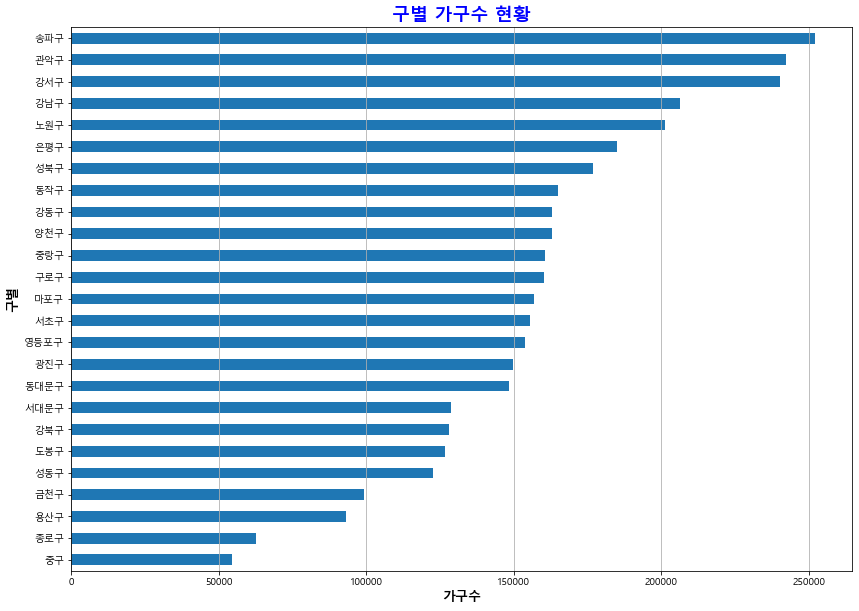

In [148]:
plt.figure(figsize=(14, 10))
df['일반가구수'].sort_values().plot(kind='barh')
plt.grid(axis='x')
plt.xlabel('가구수', fontdict=label_font)
plt.ylabel('구별', fontdict=label_font)
plt.title('구별 가구수 현황', fontdict=title_font)
plt.show()

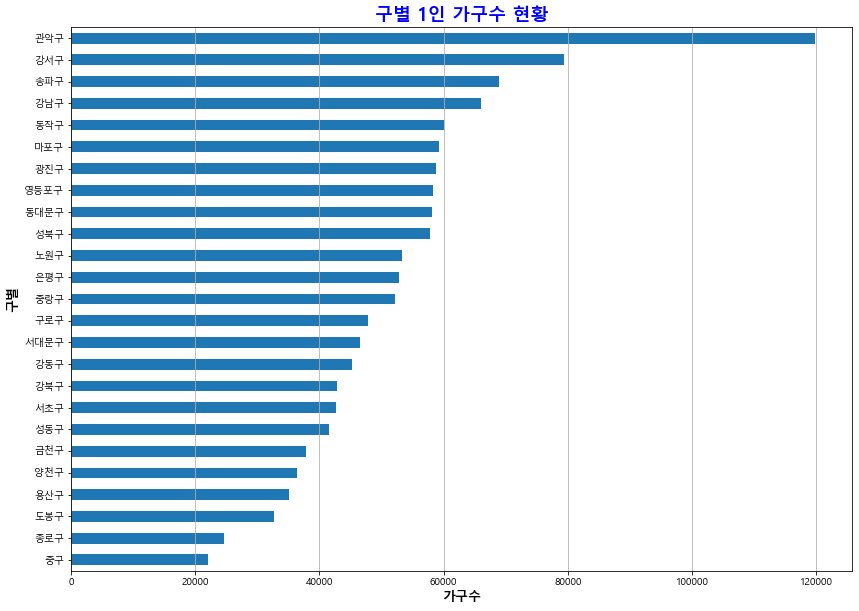

In [149]:
plt.figure(figsize=(14, 10))
df['1인'].sort_values().plot(kind='barh')
plt.grid(axis='x')
plt.xlabel('가구수', fontdict=label_font)
plt.ylabel('구별', fontdict=label_font)
plt.title('구별 1인 가구수 현황', fontdict=title_font)
plt.show()

In [150]:
corr_df = df[['1인비율', '4인이상비율', '일반가구수', '인구수', '외국인비율', '고령자비율']]
corr_df.corr()

,1인비율,4인이상비율,일반가구수,인구수,외국인비율,고령자비율
1인비율,1.000000,-0.949540,-0.226057,-0.414238,0.590722,0.108239
4인이상비율,-0.949540,1.000000,0.356905,0.536251,-0.623285,-0.326916
일반가구수,-0.226057,0.356905,1.000000,0.972897,-0.585550,-0.504173
인구수,-0.414238,0.536251,0.972897,1.000000,-0.617271,-0.544650
외국인비율,0.590722,-0.623285,-0.585550,-0.617271,1.000000,0.139582
고령자비율,0.108239,-0.326916,-0.504173,-0.544650,0.139582,1.000000


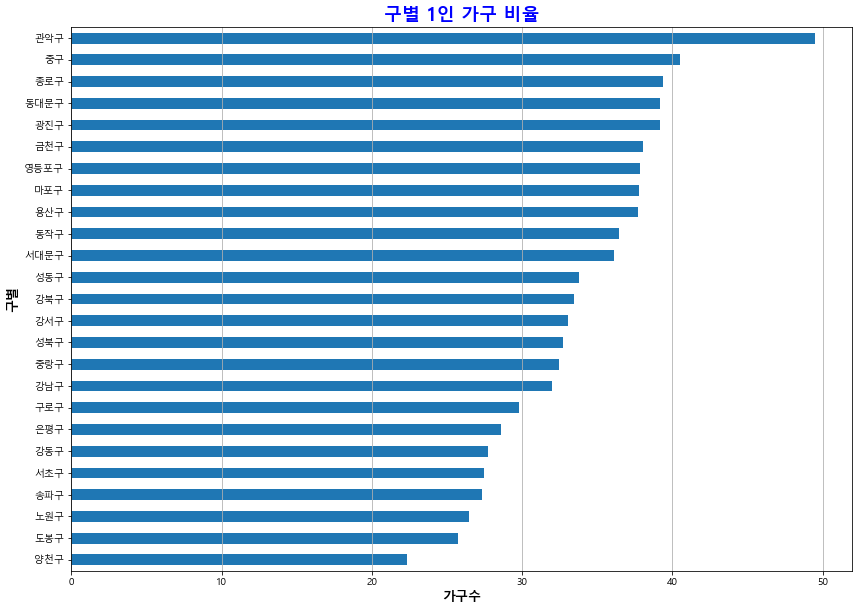

In [151]:
df['1인비율'].sort_values().plot(kind='barh', figsize=(14, 10))
plt.grid(axis='x')
plt.xlabel('가구수', fontdict=label_font)
plt.ylabel('구별', fontdict=label_font)
plt.title('구별 1인 가구 비율', fontdict=title_font)
plt.show()

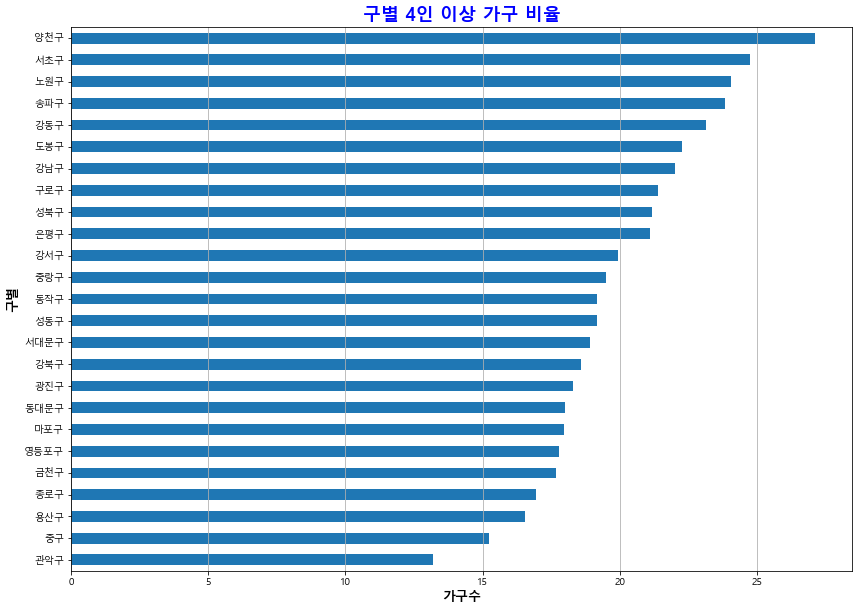

In [152]:
df['4인이상비율'].sort_values().plot(kind='barh', figsize=(14, 10))
plt.grid(axis='x')
plt.xlabel('가구수', fontdict=label_font)
plt.ylabel('구별', fontdict=label_font)
plt.title('구별 4인 이상 가구 비율', fontdict=title_font)
plt.show()

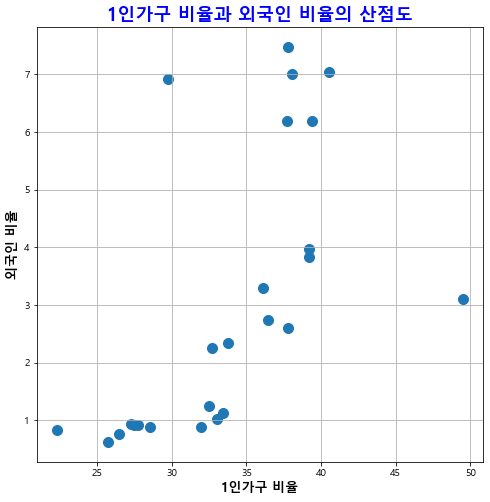

In [153]:
# 1인 가구 비율과 외국인 비율의 산점도
plt.figure(figsize=(8, 8))
plt.scatter(df['1인비율'], df['외국인비율'], s=100)
plt.title('1인가구 비율과 외국인 비율의 산점도', fontdict=title_font)
plt.xlabel('1인가구 비율', fontdict=label_font)
plt.ylabel('외국인 비율', fontdict=label_font)
plt.grid(); plt.show()

In [154]:
fp1 = np.polyfit(df['1인비율'], df['외국인비율'], 1)
fp1

array([ 0.23480781, -4.92658962])

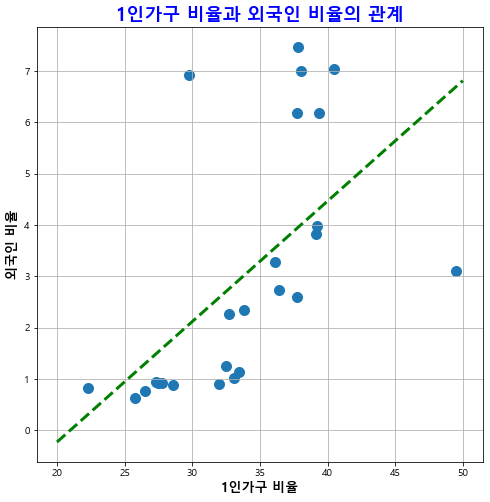

In [155]:
fx = np.array([20, 50])
f1 = np.poly1d(fp1)
fy = f1(fx)

plt.figure(figsize=(8, 8))
plt.scatter(df['1인비율'], df['외국인비율'], s=100)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.title('1인가구 비율과 외국인 비율의 관계', fontdict=title_font)
plt.xlabel('1인가구 비율', fontdict=label_font)
plt.ylabel('외국인 비율', fontdict=label_font)
plt.grid(); plt.show()

In [156]:
df['오차'] = np.abs(df['외국인비율'] - f1(df['1인비율']))

df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head()

,1인,2인,3인,4인이상,일반가구수,1인비율,4인이상비율,평균가구원수,인구수,외국인비율,고령자비율,오차
구별,,,,,,,,,,,,
구로구,47740,43700,34624,34314,160378,29.767175,21.395703,2.4,435751,6.924138,15.906332,4.861162
관악구,119863,55423,34875,31993,242154,49.498666,13.211840,2.0,514555,3.105790,15.198764,3.590293
영등포구,58214,38671,29661,27377,153923,37.820209,17.786166,2.2,405982,7.476194,14.982438,3.522303
금천구,37778,25207,18771,17559,99315,38.038564,17.680109,2.2,249641,7.003657,15.767041,2.998495
중구,22078,14578,9540,8300,54496,40.513065,15.230476,2.1,135321,7.035863,17.931437,2.449668


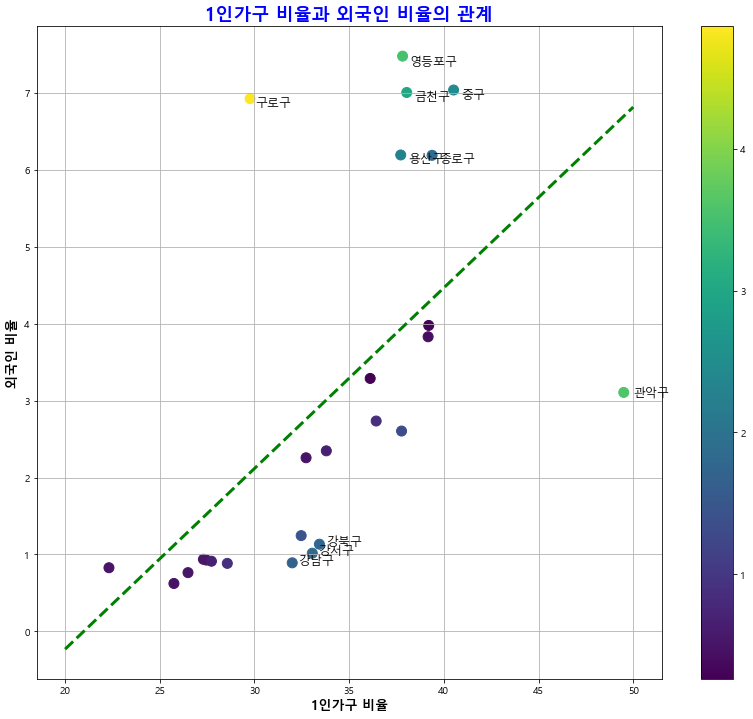

In [162]:
plt.figure(figsize=(14, 12))
plt.scatter(df['1인비율'], df['외국인비율'], c=df['오차'], s=100)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['1인비율'][n] * 1.01, df_sort['외국인비율'][n] * 0.985, df_sort.index[n], fontsize=12)

plt.xlabel('1인가구 비율', fontdict=label_font)
plt.ylabel('외국인 비율', fontdict=label_font)
plt.title('1인가구 비율과 외국인 비율의 관계', fontdict=title_font)
plt.colorbar(); plt.grid(); plt.show()